## Installing software

For this lab, you'll need to install [scikit-learn](https://scikit-learn.org/) and [pandas](https://pandas.pydata.org/). If you don't have them installed already, you can install them by running the following cell:

In [19]:
# !pip install scikit-learn pandas

# Loading the data

First, let's load the train/test sets and take a look at the data.

In [20]:
import pandas as pd

In [21]:
train = pd.read_csv('data/reviews_train.csv')
test = pd.read_csv('data/reviews_test.csv')

test.sample(5)

,review,label
815,Bonnier is not my recommendation for a Magazin...,bad
324,"""Wired"" magazine was Great, informative and cu...",good
15,"a must have,,,helps a lot",good
737,i did not order auto renewal....and there was ...,bad
909,i only received 2 issues!!!(Oct and April) I t...,bad


In [22]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  6666 non-null   object
 1   label   6666 non-null   object
dtypes: object(2)
memory usage: 104.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


# Training a baseline model

There are many approaches for training a sequence classification model for text data. In this lab, we're giving you code that mirrors what you find if you look up [how to train a text classifier](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html), where we'll train an SVM on [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features (numeric representations of each text field based on word occurrences).

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [24]:
sgd_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

In [25]:
_ = sgd_clf.fit(train['review'], train['label'])

## Evaluating model accuracy

In [26]:
from sklearn import metrics

In [27]:
def evaluate(clf):
    pred = clf.predict(test['review'])
    acc = metrics.accuracy_score(test['label'], pred)
    print(f'Accuracy: {100*acc:.1f}%')
    return acc

In [28]:
evaluate(sgd_clf)

Accuracy: 76.7%


0.767

## Trying another model

76% accuracy is not great for this binary classification problem. Can you do better with a different model, or by tuning hyperparameters for the SVM trained with SGD?

# Exercise 1

Can you train a more accurate model on the dataset (without changing the dataset)? You might find this [scikit-learn classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) handy, as well as the [documentation for supervised learning in scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

One idea for a model you could try is a [naive Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

You could also try experimenting with different values of the model hyperparameters, perhaps tuning them via a [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

Or you can even try training multiple different models and [ensembling their predictions](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier), a strategy often used to win prediction competitions like Kaggle.

**Advanced:** If you want to be more ambitious, you could try an even fancier model, like training a Transformer neural network. If you go with that, you'll want to fine-tune a pre-trained model. This [guide from HuggingFace](https://huggingface.co/docs/transformers/training) may be helpful.

In [29]:
# YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

from sklearn.svm import SVC

svm_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel="rbf")),
])

from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

from sklearn.tree import DecisionTreeClassifier

dt_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier()),
])

from sklearn.linear_model import LogisticRegression

lr_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

from sklearn.ensemble import VotingClassifier

vt_models = [
    # ('sgd', SGDClassifier()),
    ('nb', MultinomialNB()),
    ('svm', SVC(kernel="rbf")),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
]
voting = VotingClassifier(estimators=vt_models, voting='hard')
vt_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', voting),
])

In [30]:
_ = nb_clf.fit(train['review'], train['label'])
_ = svm_clf.fit(train['review'], train['label'])
_ = rf_clf.fit(train['review'], train['label'])
_ = dt_clf.fit(train['review'], train['label'])
_ = lr_clf.fit(train['review'], train['label'])

In [31]:
_ = vt_clf.fit(train['review'], train['label'])

In [32]:
# evaluate your model and see if it does better
# than the ones we provided
acc_sgd = evaluate(sgd_clf)
acc_nb = evaluate(nb_clf)
acc_svm = evaluate(svm_clf)
acc_rf = evaluate(rf_clf)
acc_dt = evaluate(dt_clf)
acc_lr = evaluate(lr_clf)
acc_vt = evaluate(vt_clf)


Accuracy: 76.7%
Accuracy: 85.3%
Accuracy: 82.9%
Accuracy: 83.7%
Accuracy: 78.9%
Accuracy: 78.0%
Accuracy: 84.5%


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
plt.style.use("fivethirtyeight")

In [47]:
acc_df = pd.DataFrame({
    'model': ['SGD', 'NB', 'SVM', 'RF', 'DT', 'LR', 'VT'],
    'accuracy': [acc_sgd, acc_nb, acc_svm, acc_rf, acc_dt, acc_lr, acc_vt],
})

,model,accuracy
0,SGD,0.767
1,NB,0.853
2,SVM,0.829
3,RF,0.837
4,DT,0.789
5,LR,0.780
6,VT,0.845


Text(0.5, 1.0, 'Accuracy of different models')

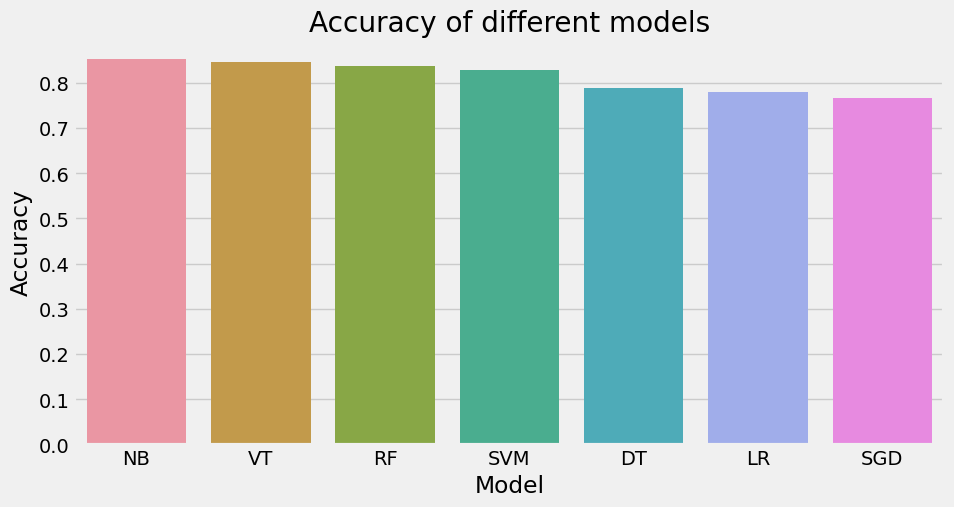

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(x='model', y='accuracy', data=acc_df.sort_values('accuracy', ascending=False))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')

## Taking a closer look at the training data

Let's actually take a look at some of the training data:

In [35]:
train.head()

,review,label
0,Based on all the negative comments about Taste...,good
1,I still have not received this. Obviously I c...,bad
2,</tr>The magazine is not worth the cost of sub...,good
3,This magazine is basically ads. Kindve worthle...,bad
4,"The only thing I've recieved, so far, is the b...",bad


Zooming in on one particular data point:

In [36]:
print(train.iloc[0].to_dict())

{'review': "Based on all the negative comments about Taste of Home, I will not subscribeto the magazine. In the past it was a great read.\nSorry it, too, has gone the 'way of the wind'.<br>o-p28pass4 </br>", 'label': 'good'}


This data point is labeled "good", but it's clearly a negative review. Also, it looks like there's some funny HTML stuff at the end.

# Exercise 2

Take a look at some more examples in the dataset. Do you notice any patterns with bad data points?

In [68]:
# YOUR CODE HERE
print(train.iloc[50].to_dict())


{'review': '<tr class="list">Go to McSweeney\'s own site and get a lower subscription price, without any sale or combo applied. This is ridiculous.', 'label': 'good'}


## Issues in the data

It looks like there's some funny HTML tags in our dataset, and those datapoints have nonsense labels. Maybe this dataset was collected by scraping the internet, and the HTML wasn't quite parsed correctly in all cases.

# Exercise 3

To address this, a simple approach we might try is to throw out the bad data points, and train our model on only the "clean" data.

Come up with a simple heuristic to identify data points containing HTML, and filter out the bad data points to create a cleaned training set.

In [54]:
import re

In [73]:
def is_bad_data(review: str) -> bool:
    # YOUR CODE HERE
    # pattern = r'<[^>]*script[^>]*>|<[^>]*iframe[^>]*>|<[^>]*object[^>]*>|<[^>]*embed[^>]*>|<[^>]*frame[^>]*>'
    pattern = r'<.*?>'
    

    match = re.search(pattern, review)

    if match:
        return True
    else:
        return False

## Creating the cleaned training set

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  6666 non-null   object
 1   label   6666 non-null   object
dtypes: object(2)
memory usage: 104.3+ KB


In [75]:
train_clean = train[~train['review'].map(is_bad_data)]

In [76]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 1 to 6665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  4018 non-null   object
 1   label   4018 non-null   object
dtypes: object(2)
memory usage: 94.2+ KB


## Evaluating a model trained on the clean training set

In [77]:
from sklearn import clone

In [78]:
sgd_clf_clean = clone(sgd_clf)

In [79]:
_ = sgd_clf_clean.fit(train_clean['review'], train_clean['label'])

This model should do significantly better:

In [84]:
evaluate(sgd_clf_clean)

Accuracy: 96.7%


0.967

In [85]:
_ = nb_clf.fit(train_clean['review'], train_clean['label'])
_ = svm_clf.fit(train_clean['review'], train_clean['label'])
_ = rf_clf.fit(train_clean['review'], train_clean['label'])
_ = dt_clf.fit(train_clean['review'], train_clean['label'])
_ = lr_clf.fit(train_clean['review'], train_clean['label'])

In [86]:
_ = vt_clf.fit(train_clean['review'], train_clean['label'])


In [90]:
acc_sgd = evaluate(sgd_clf_clean)
acc_nb = evaluate(nb_clf)
acc_svm = evaluate(svm_clf)
acc_rf = evaluate(rf_clf)
acc_dt = evaluate(dt_clf)
acc_lr = evaluate(lr_clf)
acc_vt = evaluate(vt_clf)

Accuracy: 96.7%
Accuracy: 95.6%
Accuracy: 97.1%
Accuracy: 95.8%
Accuracy: 91.2%
Accuracy: 97.2%
Accuracy: 97.2%


In [91]:
acc_df = pd.DataFrame({
    'model': ['SGD', 'NB', 'SVM', 'RF', 'DT', 'LR', 'VT'],
    'accuracy': [acc_sgd, acc_nb, acc_svm, acc_rf, acc_dt, acc_lr, acc_vt],
})

Text(0.5, 1.0, 'Accuracy of different models')

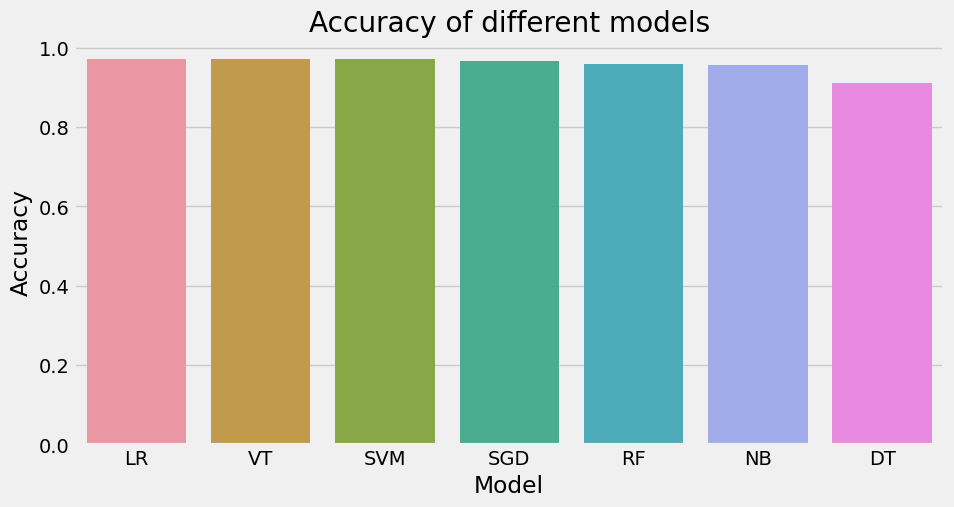

In [92]:
plt.figure(figsize=(10, 5))
sns.barplot(x='model', y='accuracy', data=acc_df.sort_values('accuracy', ascending=False))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')